In [75]:
# This script contains the following:
# 1. Importing libraries and data 
# 2. The elbow technique
# 3. k-means clustering

In [76]:
# 1. Importing libraries and data

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [78]:
# Define path
path = r'C:\\Users\\nakarton\\Downloads\\NakartonDataFiles\\Life Expectancy 2000-2020'

In [79]:
path

'C:\\\\Users\\\\nakarton\\\\Downloads\\\\NakartonDataFiles\\\\Life Expectancy 2000-2020'

In [80]:
# Import dataset
df_life_clean = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','life_expectancy_clean.csv'))

In [81]:
df_life_clean.shape

(1904, 14)

In [82]:
# 1.2. Data cleaning

In [83]:
# Drop Columns
df_life_clean.drop(columns = ['Unnamed: 0', 'Country', 'Continent', 'Population category'])

,Year,life_expect,Population,CO2_emiss,health_spend,internet_usage,open_defecation,drinking_water_services,adult_obesity,beer_consumption
0,2000,73.955,3089027,1.026213,7.233370,0.114097,0.888853,86.754471,12.8,1.33431
1,2001,74.288,3060173,1.055496,7.139524,0.325798,0.836397,86.904070,13.3,1.48995
2,2002,74.579,3051010,1.232379,6.909341,0.390081,0.781899,87.451635,13.9,1.28697
3,2003,74.828,3039616,1.338985,7.063490,0.971900,0.728191,87.987194,14.4,1.44830
4,2004,75.039,3026939,1.404059,6.773372,2.420388,0.675281,88.510583,15.0,1.37617
...,...,...,...,...,...,...,...,...,...,...
1899,2011,52.896,12894323,0.884886,8.081738,8.400000,26.876148,67.016076,10.8,2.05000
1900,2012,55.032,13115149,0.915735,6.918354,12.000000,26.533231,66.491185,11.1,2.07000
1901,2013,56.897,13350378,0.919824,7.110148,15.500000,26.188786,65.966474,11.3,2.12000
1902,2014,58.410,13586710,0.889104,8.133525,16.364740,25.832157,65.454108,11.6,2.23000


In [84]:
df_life_clean = df_life_clean.drop(columns = ['Unnamed: 0', 'Country', 'Continent', 'Population category'])

In [85]:
df_life_clean.columns

Index(['Year', 'life_expect', 'Population', 'CO2_emiss', 'health_spend',
       'internet_usage', 'open_defecation', 'drinking_water_services',
       'adult_obesity', 'beer_consumption'],
      dtype='object')

In [86]:
df_numeric=df_life_clean[['life_expect','drinking_water_services', 'adult_obesity', 'internet_usage', 'open_defecation']]

In [87]:
numeric_columns = ['life_expect','drinking_water_services', 'adult_obesity', 'open_defecation', 'internet_usage']

In [88]:
scaler = StandardScaler()
df_numeric[numeric_columns] = scaler.fit_transform(df_numeric[numeric_columns])

C:\Users\nakarton\AppData\Local\Temp\ipykernel_20708\3849413049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[numeric_columns] = scaler.fit_transform(df_numeric[numeric_columns])


In [89]:
df_numeric.head()

,life_expect,drinking_water_services,adult_obesity,internet_usage,open_defecation
0,0.369703,-0.004663,-0.415698,-1.066846,-0.497022
1,0.408939,0.003837,-0.354806,-1.059222,-0.500046
2,0.443227,0.034952,-0.281735,-1.056907,-0.503187
3,0.472566,0.065384,-0.220843,-1.035952,-0.506283
4,0.497428,0.095124,-0.147772,-0.983785,-0.509333


In [90]:
# 2. The elbow technique

In [91]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [92]:
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

C:\Users\nakarton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nakarton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nakarton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nakarton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

In [93]:
score

[-9520.000000000007,
 -4289.935564685732,
 -2859.6127325193206,
 -2305.8909197624853,
 -1887.2016925756616,
 -1694.189803349224,
 -1543.1252286179842,
 -1424.1255867686714,
 -1329.807316093285]

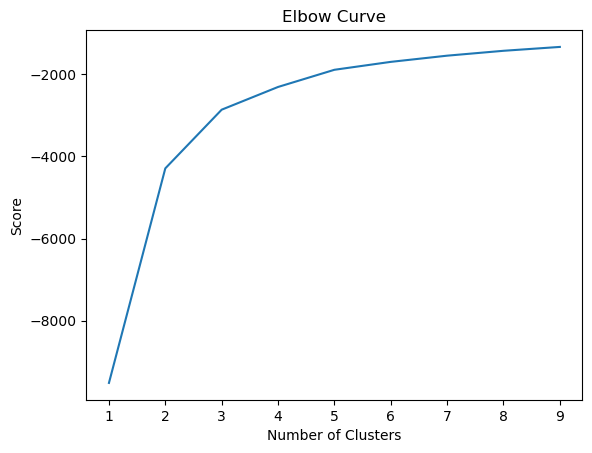

C:\Users\nakarton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nakarton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nakarton\AppData\Local\Temp\ipykernel_20708\3707773142.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['cluster'] = kmeans.fit_predict(df_numeric)


cluster
2    786
0    702
1    416
Name: count, dtype: int64

In [94]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()
# create kmeans object
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_numeric)
df_numeric['cluster'] = kmeans.fit_predict(df_numeric)
df_numeric['cluster'].value_counts()

In [95]:
# 3. k-means clustering

In [96]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [97]:
# Fit the k-means object to the data
kmeans.fit(df_life_clean)

C:\Users\nakarton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [98]:
df_life_clean['clusters'] = kmeans.fit_predict(df_life_clean)

C:\Users\nakarton\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [99]:
df_life_clean.head()

,Year,life_expect,Population,CO2_emiss,health_spend,internet_usage,open_defecation,drinking_water_services,adult_obesity,beer_consumption,clusters
0,2000,73.955,3089027,1.026213,7.233370,0.114097,0.888853,86.754471,12.8,1.33431,0
1,2001,74.288,3060173,1.055496,7.139524,0.325798,0.836397,86.904070,13.3,1.48995,0
2,2002,74.579,3051010,1.232379,6.909341,0.390081,0.781899,87.451635,13.9,1.28697,0
3,2003,74.828,3039616,1.338985,7.063490,0.971900,0.728191,87.987194,14.4,1.44830,0
4,2004,75.039,3026939,1.404059,6.773372,2.420388,0.675281,88.510583,15.0,1.37617,0


In [100]:
df_life_clean['clusters'].value_counts()

clusters
0    1740
2     132
1      32
Name: count, dtype: int64

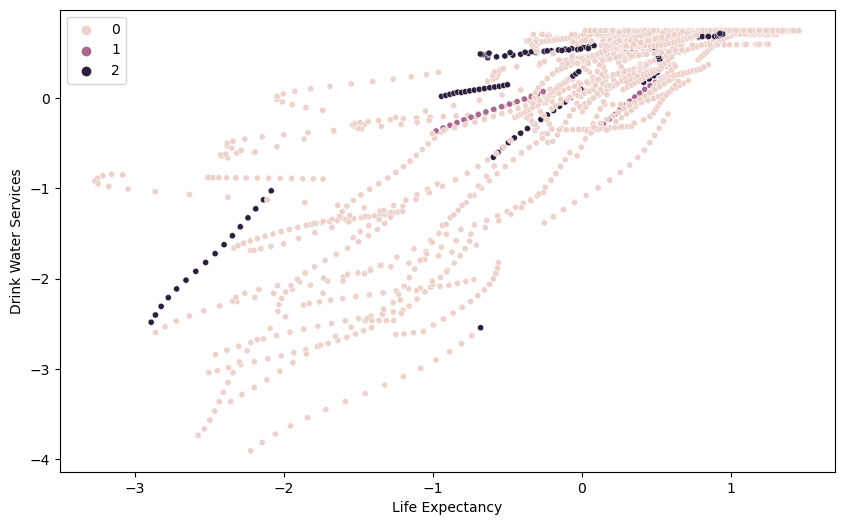

In [101]:
# Plot the clusters for the life_expect and drinking_water_services variables
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['life_expect'], y=df_numeric['drinking_water_services'], hue=kmeans.labels_, s=20)
ax.grid(False)
plt.xlabel('Life Expectancy')
plt.ylabel('Drink Water Services')
plt.show()

In [102]:
# The purple are clustered together with few outliers. The pink have minimal clusters while the dark purple has more wide spread clusters.

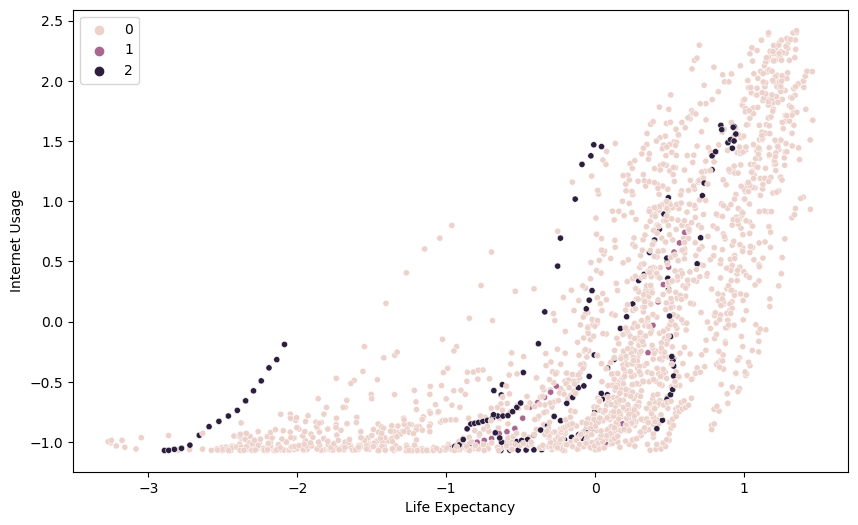

In [103]:
# Plot the clusters for the life_expect and internet_usage variables
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['life_expect'], y=df_numeric['internet_usage'], hue=kmeans.labels_, s=20)
ax.grid(False)
plt.xlabel('Life Expectancy')
plt.ylabel('Internet Usage')
plt.show()

In [104]:
# There is massive increase in the cluster of dark purple between internet usage and life expectancy from 70 to 80. The purple has very minimal datapoints.

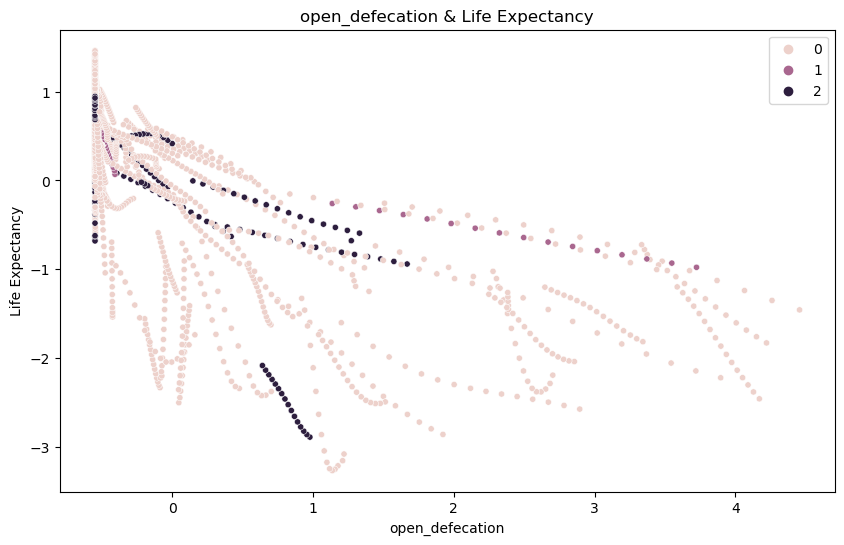

In [105]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['open_defecation'], y=df_numeric['life_expect'], hue=kmeans.labels_, s=20)
plt.title('open_defecation & Life Expectancy')
plt.xlabel('open_defecation')
plt.ylabel('Life Expectancy')
ax.grid(False)
plt.show()

In [106]:
df_numeric.loc[df_numeric['cluster'] == 2, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['cluster'] == 1, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['cluster'] == 0, 'cluster'] = 'pink'

C:\Users\nakarton\AppData\Local\Temp\ipykernel_20708\860433461.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_numeric.loc[df_numeric['cluster'] == 2, 'cluster'] = 'dark purple'


In [107]:
df_numeric.groupby('cluster').agg({'internet_usage':['mean', 'median'],
                           'adult_obesity':['mean', 'median'],
                           'drinking_water_services':['mean', 'median'],
                           'life_expect':['mean', 'median']})

internet_usage           adult_obesity            \
                      mean    median          mean    median   
cluster                                                        
dark purple      -0.524558 -0.619301     -0.039127  0.071440   
pink              1.135145  1.144938      0.825168  0.789968   
purple           -0.924444 -0.999895     -1.318543 -1.402153   

            drinking_water_services           life_expect            
                               mean    median        mean    median  
cluster                                                              
dark purple                0.258225  0.324897    0.091349  0.159439  
pink                       0.655779  0.731008    0.797348  0.867870  
purple                    -1.594524 -1.553865   -1.518120 -1.457333

In [108]:
# From the scatterplots, this data could be used to check:
# 1. Population vs internet usage
# 2. Internet usage vs life expectancy (Possible impact of internet as means of communication)
# 3. Drinking water services vs life expectancy